In [4]:
!pip install numpy==1.26.4
!pip install scikit-learn==1.5.0

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [12]:
age = [ages for ages in df['person_age'] if ages<=100]

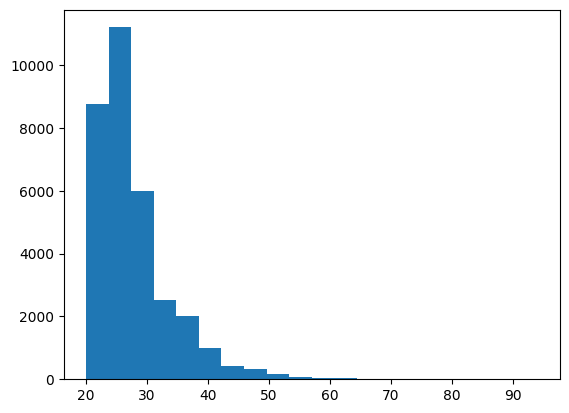

In [13]:
plt.hist(age, bins=20)
plt.show()

In [14]:
min(df["person_age"])

20

In [15]:
print(max(df["person_income"]))
print(min(df["person_income"]))

6000000
4000


In [16]:
age2 = df["person_age"]

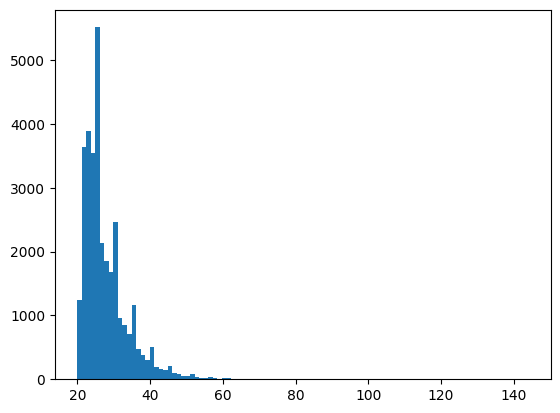

In [17]:
plt.hist(age2, bins=100)
plt.show()

In [18]:
df["person_age"].isnull().sum()

0

In [19]:
income = [inc for inc in df["person_income"] if inc<=1000000]

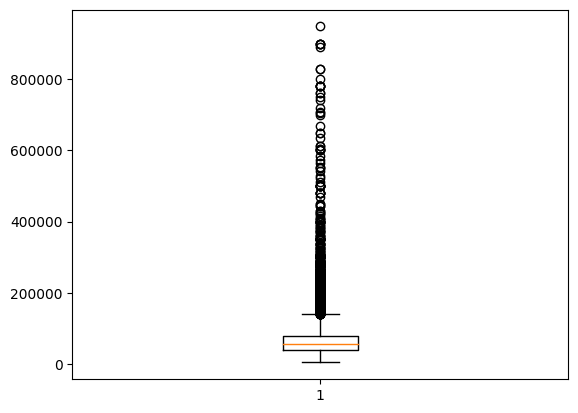

In [20]:
plt.boxplot(income)
plt.show()

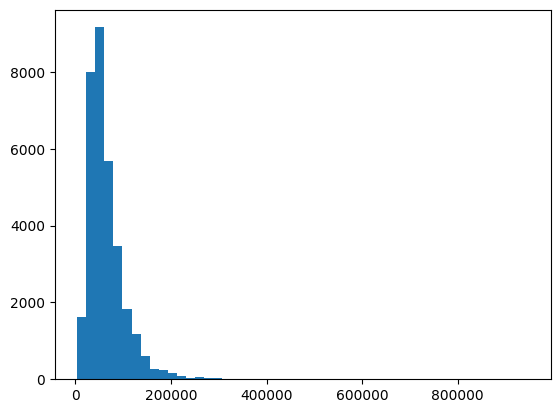

In [21]:
plt.hist(income, bins=50)
plt.show()

In [22]:
df['person_age'] = df['person_age'].clip(lower=0, upper=65)

In [23]:
df.head(1)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3


In [24]:
max(df['person_age'])

65

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df["person_emp_length"].fillna(df["person_emp_length"].mean(), inplace=True)

In [27]:
df["person_emp_length"].isnull().sum()

0

In [28]:
emp_length = df["person_emp_length"]

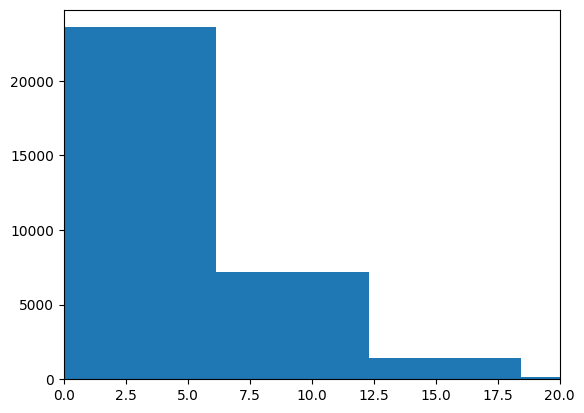

In [29]:
plt.hist(emp_length, bins=20)
plt.xlim(0,20)
plt.show()

In [30]:
df["loan_int_rate"].fillna(df["loan_int_rate"].mean(), inplace=True)

In [31]:
df["loan_int_rate"].isnull().sum()

0

In [32]:
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
columns = ["person_home_ownership","loan_intent","loan_grade","cb_person_default_on_file"]

In [35]:
for col in columns:
  df[col] = le.fit_transform(df[col])

In [36]:
df.sample(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
29409,39,65000,3,4.0,2,1,16000,11.83,0,0.25,0,16
3245,23,74000,3,1.0,1,2,3500,12.87,0,0.05,1,3
29125,37,80000,3,0.0,2,1,35000,11.99,1,0.44,0,17
21723,30,50000,0,2.0,2,1,3000,10.59,0,0.06,0,5
27077,32,91800,0,8.0,3,4,24625,14.07,1,0.23,1,7


In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
df = df.drop("person_income",axis=1)

In [39]:
# df["person_income"] = MinMaxScaler().fit_transform(np.array(df["person_income"]).reshape(-1,1))
# df["person_income"] = df["person_income"]*10000
df["loan_amnt"] = MinMaxScaler().fit_transform(np.array(df["loan_amnt"]).reshape(-1,1))
# df["loan_amnt"] = df["loan_amnt"]*100

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
import xgboost as xgb

In [44]:
model_XGB = xgb.XGBClassifier(objective="binary:logistic", evel_matric='logloss', use_label_encoder=False)

In [45]:
model_XGB.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:36:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "evel_matric", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, evel_matric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [46]:
y_pred_XGB = model_XGB.predict(X_test)

In [47]:
y_pred_XGB

array([0, 1, 0, ..., 0, 0, 0])

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
accuracy = accuracy_score(y_test, y_pred_XGB)

In [50]:
accuracy

0.9318322023442319

In [51]:
cm = confusion_matrix(y_test, y_pred_XGB)
cr = classification_report(y_test, y_pred_XGB)
print(cm)
print(cr)

[[5036   37]
 [ 405 1006]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5073
           1       0.96      0.71      0.82      1411

    accuracy                           0.93      6484
   macro avg       0.95      0.85      0.89      6484
weighted avg       0.93      0.93      0.93      6484



In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)

In [54]:
model_RF.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [55]:
y_pred_RF = model_RF.predict(X_test)
y_pred_RF

array([0, 1, 0, ..., 0, 0, 0])

In [56]:
accuracy_RF = accuracy_score(y_pred_RF, y_test)
accuracy_RF

0.9267427513880321

In [57]:
cm = confusion_matrix(y_test, y_pred_RF)
cr = classification_report(y_test, y_pred_RF)
print(cm)
print(cr)

[[5043   30]
 [ 445  966]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5073
           1       0.97      0.68      0.80      1411

    accuracy                           0.93      6484
   macro avg       0.94      0.84      0.88      6484
weighted avg       0.93      0.93      0.92      6484



In [58]:
import pickle

In [62]:
fname="model_XGB.pkl"
pickle.dump(model_XGB, open(fname, 'wb'))

In [63]:
import h5py

try:
    with h5py.File("model.h5", "r") as f:
        print("File is a valid HDF5 file")
except OSError:
    print("File is not a valid HDF5 file")


File is not a valid HDF5 file


In [64]:
import pickle

# Save the trained model as a .pkl file
with open('model.pkl', 'wb') as file:
    pickle.dump(model_XGB, file)

In [65]:
l = [2,'s']
print(type(l[0]))
print(type(l[1]))

<class 'int'>
<class 'str'>


In [66]:
l[0] = 'a'
l[1] = 3
print(type(l[0]))
print(type(l[1]))

<class 'str'>
<class 'int'>
